In [11]:
import pandas as pd

sensor_data = "001_b45731a0_raw_sensor_data.csv"
cognitive_phase_data = "001-cognitive-phase.csv"

df_sensor = pd.read_csv(sensor_data, low_memory=False)
df_phases = pd.read_csv(cognitive_phase_data)

df_sensor.head()
df_phases.head()

# print(df_sensor['Timestamp'].dtype)
# print(df_phases['Time Started'].dtype)



,Time Started,Cognitive Task,Screens
0,0:00:00,Data Exploration,Supporting material
1,0:02:42,Data Exploration,Map
2,0:02:47,Data Exploration,Supporting material
3,0:03:00,Data Exploration,Map
4,0:03:05,Generate Hypothesis,Supporting material


In [12]:
import datetime

# Define a function to convert a time string to milliseconds
def time_to_ms(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()  # Parse time string to time object
    delta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)  # Create timedelta object
    ms = delta_obj.total_seconds() * 1000  # Convert to milliseconds
    return ms

# Convert the 'Time Started' column to milliseconds
df_phases['Time Started'] = df_phases['Time Started'].apply(time_to_ms)

# Print the resulting DataFrame
print(df_phases)
print(df_phases['Time Started'].dtype)


     Time Started       Cognitive Task              Screens
0             0.0     Data Exploration  Supporting material
1        162000.0     Data Exploration                  Map
2        167000.0     Data Exploration  Supporting material
3        180000.0     Data Exploration                  Map
4        185000.0  Generate Hypothesis  Supporting material
..            ...                  ...                  ...
166     2545000.0       Assess Results                  Map
167     2551000.0      Test Hypothesis               Filter
168     2557000.0       Assess Results                  Map
169     2564000.0       Assess Results           Statistics
170     2602000.0             Conclude  Supporting material

[171 rows x 3 columns]
float64


In [13]:
merged_df = pd.merge_asof(df_sensor, df_phases, left_on='Timestamp', right_on='Time Started')
final_df = merged_df[['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion','Cognitive Task', 'Screens']]
final_df.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
0,36236.0,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,0.0,0.030948,0.004428,Data Exploration,Supporting material
1,36254.9,0.125566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Exploration,Supporting material
2,36269.0,0.125566,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,0.0,0.051102,0.007234,Data Exploration,Supporting material
3,36284.9,0.125566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Exploration,Supporting material
4,36301.0,0.125566,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,0.328766,0.0,0.043316,0.012638,Data Exploration,Supporting material


In [29]:
#Remove rows with empty emotions data
final_df = final_df.dropna(subset=['Contempt'])
final_df.to_csv('001-b45731a0_emotions_with_cognitive_tesk_and_screen.csv', index=False)
final_df.tail()

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
158537,2699946.0,3.681722,0.140199,0.024844,4.939115,0.038651,0.110343,2.680707,0.328766,0.0,0.038054,0.009343,Conclude,Supporting material
158538,2699979.0,3.479876,0.137436,0.024335,4.663588,0.039819,0.109299,2.567321,0.328766,0.0,0.027288,0.009260,Conclude,Supporting material
158539,2700009.0,3.171252,0.139108,0.024456,4.206734,0.039129,0.109841,2.291128,0.328766,0.0,0.025101,0.010269,Conclude,Supporting material
158540,2700041.0,3.140329,0.137927,0.024342,4.166446,0.039638,0.109387,2.280451,0.328766,0.0,0.023803,0.012145,Conclude,Supporting material
158541,2700073.0,3.286117,0.138426,0.024482,4.377196,0.039399,0.109571,2.393333,0.328766,0.0,0.025101,0.014538,Conclude,Supporting material


In [15]:
display(final_df.sample(15))

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
36740,655163.0,0.140385,0.191845,0.027332,0.140144,0.024093,0.126714,0.057011,0.328766,0.000000,0.017334,0.032494,Assess Results,Map
20542,382924.0,0.125566,0.007412,0.221380,0.292866,3.295407,0.030474,0.084329,57.400864,40.771053,0.020098,0.013825,Set Goal,Statistics
103641,1777369.0,2.067799,0.075160,0.191428,1.851235,0.106012,0.083910,0.357576,13.709357,7.359369,0.024937,0.244802,Generate Plan,Map
56616,987516.0,0.092684,0.000110,4.988344,0.019775,99.975281,0.006813,0.066494,99.980370,84.703583,0.053065,0.416235,Assess Results,Filter
84781,1460779.0,0.110173,0.134780,0.020922,0.114616,0.041390,0.108772,0.055717,27.313015,0.000000,4.754396,0.019688,Test Hypothesis,Filter
57317,999194.0,0.008572,0.000134,0.001356,0.008564,95.980988,0.005657,0.078740,99.969139,99.753136,0.040671,0.040671,Generate Plan,Filter
14114,274810.0,0.125566,0.034230,0.015003,0.072985,0.377451,0.061216,0.058080,2.122647,19.749290,0.007669,0.026495,Generate Hypothesis,Supporting material
78485,1354536.0,0.128164,0.207863,0.024307,0.127140,0.024373,0.127049,0.055367,0.328766,0.000000,0.105506,0.024044,Conclude,Map
97631,1676665.0,0.235971,0.176933,0.057910,0.212082,0.027682,0.123047,0.055827,0.565526,0.000000,0.095742,0.095742,Generate Plan,Supporting material
49937,876286.0,0.133610,0.190732,0.025324,0.132946,0.024721,0.126940,0.056892,0.328766,0.000000,0.221802,0.004921,Generate Plan,Filter


In [16]:
display(final_df.describe())

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion
count,7.934500e+04,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000
mean,1.369204e+06,0.927729,0.236420,0.376627,1.479852,5.937353,0.285892,0.686932,22.137284,7.244925,1.306198,0.467868
std,7.685357e+05,2.913113,2.155168,3.247520,5.349511,22.369736,2.558369,4.342761,33.044594,23.321146,5.764883,3.648233
min,3.623600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-67.881241,0.000000,0.000000
25%,7.040750e+05,0.125566,0.151043,0.024630,0.138986,0.024360,0.115063,0.059034,0.328766,0.000000,0.034176,0.017582
50%,1.369136e+06,0.176686,0.187501,0.031779,0.235411,0.025323,0.125685,0.076229,0.643951,0.000000,0.109278,0.045959
75%,2.034843e+06,0.605015,0.192106,0.123546,0.839612,0.033621,0.127124,0.216277,46.902702,0.000000,0.501356,0.122091
max,2.700073e+06,94.093216,97.368004,93.648643,95.832893,99.979645,81.516922,99.069252,99.981064,99.933968,99.140770,96.389641


In [25]:
# Create medians df
medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).median()
# Reset index and add 'Cognitive Task' as a column
medians = medians.reset_index()
medians['Cognitive Task'] = medians['Cognitive Task']

# Print the medians dataframe
print(medians)
medians.head()

        Cognitive Task     Anger  Contempt   Disgust      Fear       Joy  \
0       Assess Results  0.204470  0.190210  0.028584  0.213075  0.024695   
1             Conclude  0.271076  0.188697  0.040446  0.240705  0.024864   
2     Data Exploration  0.125566  0.191429  0.024243  0.172462  0.024589   
3                Focus  0.125566  0.177839  0.028589  0.260052  0.027946   
4  Generate Hypothesis  0.125566  0.171775  0.047884  0.332030  0.029640   
5        Generate Plan  0.260681  0.185762  0.036460  0.253752  0.025792   
6             Set Goal  0.125566  0.173736  0.083399  0.336815  0.028013   
7      Test Hypothesis  0.237402  0.185941  0.030531  0.215016  0.025639   

    Sadness  Surprise  Engagement  Sentimentality  Confusion  
0  0.126405  0.073854    0.328766        0.106886   0.048119  
1  0.125942  0.072432    0.623257        0.071212   0.038781  
2  0.126771  0.078270    0.328766        0.080320   0.024683  
3  0.123937  0.079325    6.933750        0.176030   0.067206  


,Cognitive Task,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion
0,Assess Results,0.204470,0.190210,0.028584,0.213075,0.024695,0.126405,0.073854,0.328766,0.106886,0.048119
1,Conclude,0.271076,0.188697,0.040446,0.240705,0.024864,0.125942,0.072432,0.623257,0.071212,0.038781
2,Data Exploration,0.125566,0.191429,0.024243,0.172462,0.024589,0.126771,0.078270,0.328766,0.080320,0.024683
3,Focus,0.125566,0.177839,0.028589,0.260052,0.027946,0.123937,0.079325,6.933750,0.176030,0.067206
4,Generate Hypothesis,0.125566,0.171775,0.047884,0.332030,0.029640,0.119789,0.093780,7.327151,0.111057,0.051561


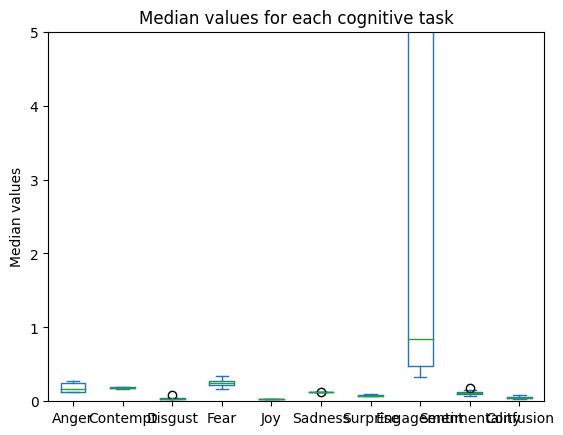

In [26]:
import matplotlib.pyplot as plt


# create a box plot of the medians
medians.plot(kind='box')

plt.ylim(0, 5)

# set the plot title and axis labels
plt.title('Median values for each cognitive task')
plt.ylabel('Median values')

# display the plot
plt.show()

Index(['Cognitive Task', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion',
       'Cognitive Task Encoded'],
      dtype='object')


<Axes: xlabel='Cognitive Task Encoded', ylabel='Anger'>

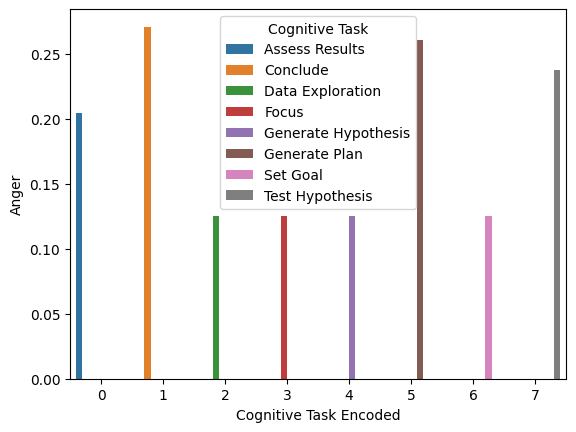

In [28]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print the column names in the dataframe
print(medians.columns)

# Encode 'Cognitive Task' column into numerical values
le = LabelEncoder()
medians['Cognitive Task Encoded'] = le.fit_transform(medians['Cognitive Task'])

# Plot boxplot with encoded categorical variable
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task')

